# COMPSCI 714 - Assignment 1

This assignment will evaluate the content covered in weeks 1 & 2. This assignment aims at evaluating your coding skills, aligned with what we covered in the lectutorials, but also your critical thinking and self-learning abilities with a few more advanced questions.

**Name**: Fan(Ryan) Zhang

**UPI**: fzha836

**Student ID**: 430587739

## **Part 1: Data loading, exploration, cleaning and pre-processing** - 17 marks

Some of the libraries useful to this part are found in the following cell. You might need to import some more yourself for some of the tasks.

In [2]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from pathlib import Path

# Import two more packages
import io
import requests
import math

# Change default setting of displaying columns
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

### **Task 1: Load the dataset** - 1 mark
The dataset used in the assignment contains multiple attributes of houses and their target sale price stored in `SalePrice`. \
You can find information about each attribute in the "Housing Price Data Dictionnary.txt" file.

**Task deliverable**:
- Load the dataset contained in the file *house_prices.csv* as a Pandas DataFrame in a variable called `df_data`.

In [4]:
# TODO
def load_dataset_from_github():
  url = 'https://raw.githubusercontent.com/Ryan-FanZhang/CS714/b6b43552718f184b99c792480a8e597a80b43a1a/Assignment-1/house_prices.csv'
  response = requests.get(url).content
  df = pd.read_csv(io.StringIO(response.decode('utf-8')))
  return df

df_data = load_dataset_from_github()

In [5]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1460 non-null   object
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   Alley          1460 non-null   object
 7   LotShape       1460 non-null   object
 8   LandContour    1460 non-null   object
 9   Utilities      1460 non-null   object
 10  LotConfig      1460 non-null   object
 11  LandSlope      1460 non-null   object
 12  Neighborhood   1460 non-null   object
 13  Condition1     1460 non-null   object
 14  Condition2     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  HouseStyle     1460 non-null   object
 17  OverallQual    1460 non-null   int64 
 18  OverallCond    1460 non-null

In [6]:
df_data.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
df_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,?,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,?,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,?,?,?,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,?,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,?,?,?,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,?,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,?,?,?,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,?,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,'Wd Sdng','Wd Shng',NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,?,?,?,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,?,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,?,?,?,0,12,2008,WD,Normal,250000


### **Task 2: Extract basic dataset information** - 2 marks

**Task deliverable**:

Complete the `extract_basic_info()` function which takes a tabular dataset in the form of a Pandas Dataframe as parameter, and returns a tuple containing the following information:
- The number of instances in the dataset.
- The total number of attributes in the dataset.
- The number of numerical attributes.
- The number of categorical attributes.
- The total memory size of the dataset.

The order of the elements in the returned tuple should follow the same order as follow: (number of instances, totoal number of attributes, number of numerical attributes, number of categorical attributes, total memory size).

**Remarks**:
- For this task, we define a numerical attribute as an attribute having numeric values. These values could represent a continuous or categorical attribute. Contrastively, we define a symbolic attribute as an attribute having non-numeric values.
- During grading, your function will be tested with the dataset previously loaded, but also with other hidden datasets. Make sure to test it to make sure it works fine on a few other datasets.

In [8]:
def extract_basic_info(df_dataset):
    # TODO
    # Get The number of instances in the dataset
    print(f"The Number of Instances: {df_dataset.shape[0]}")
    # The total number of attributes in the dataset.
    print(f"The Total Number of Attributes: {df_dataset.shape[1]}")
    # The number of numerical attributes.
    print(f"The Number of Numerical Attributes: {df_dataset.select_dtypes(include=['number']).shape[1]}")
    # The number of categorical attributes.
    print(f"The Number of Categorical Attributes: {df_dataset.select_dtypes(include=['object']).shape[1]}")
    # The total memory size of the dataset.
    print(f"The total memory size of the dataset: {df_dataset.memory_usage(index=True).sum()}")




In [9]:
extract_basic_info(df_data)

The Number of Instances: 1460
The Total Number of Attributes: 81
The Number of Numerical Attributes: 35
The Number of Categorical Attributes: 46
The total memory size of the dataset: 946212


### **Task 3: Basic exploration** - 2 marks

#### **Task 3.1 - Histograms of surface attributes** - 1 mark
This question is based on the dataset loaded in Task 1.

**Task deliverable**:
- Identify the 14 attributes representing areas in square feet in the dataset, and plot them as histograms.

**Remark**: Having a look in the data dictionary provided with the dataset might help.


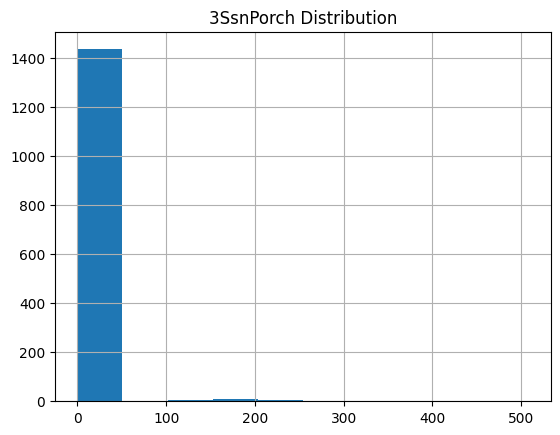

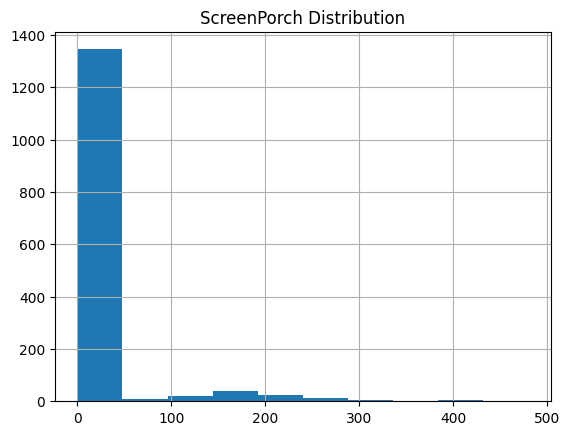

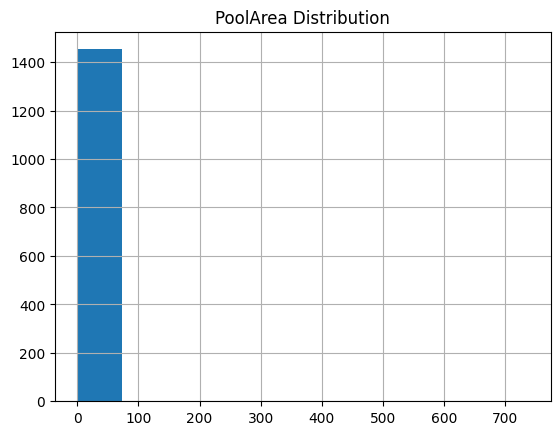

In [10]:
# From the dataset, there are 17 attributes represening areas in square feet, however, three attributes list below
# are populated with large amount of 0, then it should not be included as they are not common in most of houses

df_data['3SsnPorch'].hist()
plt.title('3SsnPorch Distribution')
plt.show()

df_data['ScreenPorch'].hist()
plt.title('ScreenPorch Distribution')
plt.show()

df_data['PoolArea'].hist()
plt.title('PoolArea Distribution')
plt.show()

In [23]:
df_data[areas_in_square_feet_attributes].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   LotArea        1460 non-null   int64 
 1   MasVnrArea     1460 non-null   object
 2   BsmtFinSF1     1460 non-null   int64 
 3   BsmtFinSF2     1460 non-null   int64 
 4   BsmtUnfSF      1460 non-null   int64 
 5   TotalBsmtSF    1460 non-null   int64 
 6   1stFlrSF       1460 non-null   int64 
 7   2ndFlrSF       1460 non-null   int64 
 8   LowQualFinSF   1460 non-null   int64 
 9   GrLivArea      1460 non-null   int64 
 10  GarageArea     1460 non-null   int64 
 11  WoodDeckSF     1460 non-null   int64 
 12  OpenPorchSF    1460 non-null   int64 
 13  EnclosedPorch  1460 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 159.8+ KB


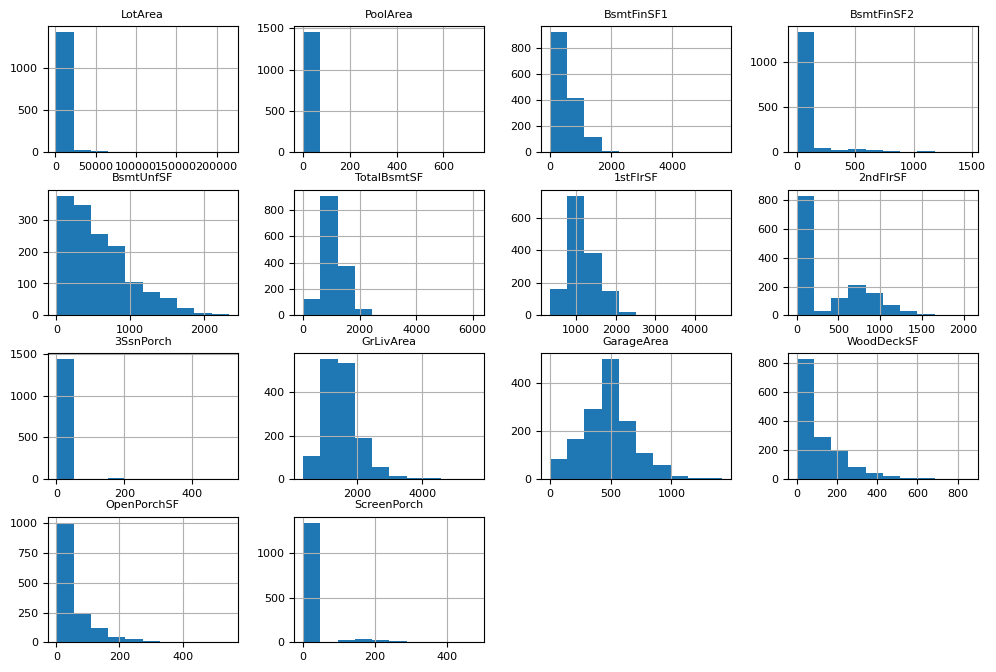

In [33]:
# TODO
areas_in_square_feet_attributes = [
    'LotArea',
    'PoolArea',
    'BsmtFinSF1',
    'BsmtFinSF2',
    'BsmtUnfSF',
    'TotalBsmtSF',
    '1stFlrSF',
    '2ndFlrSF',
    '3SsnPorch',
    'GrLivArea',
    'GarageArea',
    'WoodDeckSF',
    'OpenPorchSF',
    'ScreenPorch'
]



plt.rc('font', size=12)
plt.rc('axes', labelsize=14, titlesize=8)
plt.rc('legend', fontsize=10)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)

df_data.hist(areas_in_square_feet_attributes, figsize = (12,8))
plt.show()

#### **Task 3.2: Correlations with target** - 1 mark
**Task deliverable**:
- Display in descending order the correlation coefficients between the 14 area attributes identified previously and the target attribute `SalePrice`.

In [34]:
# TODO
corr_matrix = df_data[['LotArea', 'PoolArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice', '3SsnPorch', 'ScreenPorch']].corr()
corr_matrix['SalePrice'].sort_values(ascending=False)

,SalePrice
SalePrice,1.000000
GrLivArea,0.708624
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
BsmtFinSF1,0.386420
WoodDeckSF,0.324413
2ndFlrSF,0.319334
OpenPorchSF,0.315856
LotArea,0.263843


### **Task 4: Splitting the data in train and test sets** - 4 marks
The dataset has a modest size, so it might be worth investigating the use of stratified sampling.

#### **Task 4.1: Selecting and preparing an attribute for the sampling** - 2 marks

**Task deliverables**:

1. Select the area attribute (from Task 3.2) with the highest correlation to the target `SalePrice`. \
Based on the selected attribute, sort the instances into 4 bins. The bins edges are defined as: [$0$, $median \times 0.5$, $median$, $median \times 1.5$, $\infty$]. \
$median$ corresponds to the median value of the previously selected area attribute's values. \
Create a new attribute corresponding to the category each instance (house) is binned into.
3. Visualise the number of instances (houses) in each category with a bar plot.

The median value of GrLivArea is: 1464.0


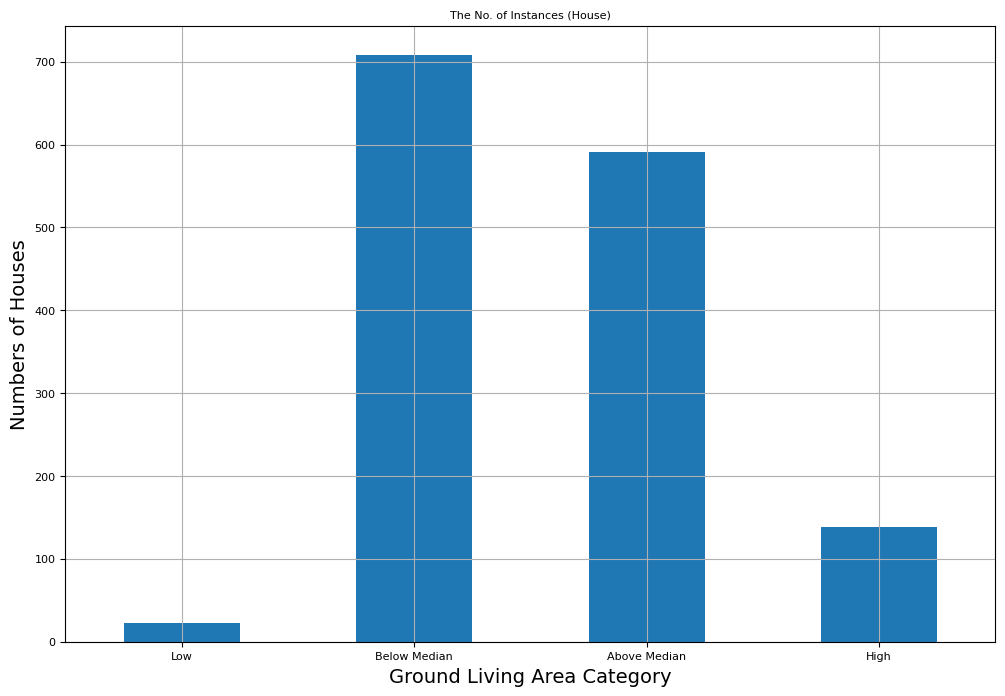

In [54]:
# TODO
median_value = df_data['GrLivArea'].median()
print(f"The median value of GrLivArea is: {median_value}")

# Sort the instances into 4 bins
bins = [0, median_value * 0.5, median_value, median_value * 1.5, np.inf]

# Create a new attribute corresponding to the category each instance (house) is binned into.
df_data['GrLivArea_Processed'] = pd.cut(df_data['GrLivArea'],
                                        bins=bins,
                                        labels=['Low', 'Below Median', 'Above Median', 'High']
                                        )

# Visualise the number of instances (houses) in each category with a bar plot.
df_data['GrLivArea_Processed'].value_counts().sort_index().plot(kind='bar',
                                                   rot = 0,
                                                   grid = True,
                                                   figsize=(12,8),
                                                   xlabel = 'Ground Living Area Category',
                                                   ylabel = 'Numbers of Houses',
                                                   title = 'The No. of Instances (House)'
                                                   )
plt.show()

#### **Task 4.2: Train/valid/test sets split using stratified sampling** - 2 marks

**Task deliverable**:

1. Split the dataset into train, validation and test sets using stratified sampling based on the the new categorical attribute you created in Task 4.1. Use a 60%/20%/20% split for train/validation/test sets.
2. Compare the proportions of instances (in percentage) for each category in:
   - the overall dataset,
   - the stratified train and test sets, and
   - randomly splitted train and test sets (without stratified sampling).
   
   Briefly explain the difference of results between stratified and random sampling. Does the choice of stratified sampling make sense in that case?

**Remark**:
- Don't forget to drop the new feature created for stratifed sampling from the training and test sets after completing this task.


In [58]:
# TODO
from sklearn.model_selection import train_test_split

# Split train set as 60% and temp set as 40%
train_set, temp_set = train_test_split(
    df_data, test_size=0.4, stratify=df_data["GrLivArea_Processed"], random_state=42)

# Split validation set as 20% out of 40% and test set as 20% out of 40%
validation_set, test_set = train_test_split(
    temp_set, test_size=0.5, stratify=temp_set["GrLivArea_Processed"], random_state=42) # Changed df_data to temp_set for this split

# Split train/validation/test sets randomly
train_set_random, temp_set_random = train_test_split(
    df_data, test_size = 0.4, random_state=42)

validation_set_random, test_set_random = train_test_split(
    temp_set_random, test_size = 0.5, random_state=42)

def groundLivingArea_Proportions(dataframe):
  return dataframe['GrLivArea_Processed'].value_counts() / len(dataframe)


compare_props = pd.DataFrame(
    {
    "Overall %": groundLivingArea_Proportions(df_data),
    "Stratified Train %": groundLivingArea_Proportions(train_set),
    "Stratified Validation %": groundLivingArea_Proportions(validation_set),
    "Stratified Test %": groundLivingArea_Proportions(test_set),
    "Random Train %": groundLivingArea_Proportions(train_set_random),
    "Random Validation %": groundLivingArea_Proportions(validation_set_random),
    "Random Test %": groundLivingArea_Proportions(test_set_random),
    }
).sort_index()

compare_props.index.name = 'Ground Living Area Category'
compare_props['Strat. Error %'] = (compare_props['Stratified Train %'] /
                                   compare_props['Overall %'] - 1)
compare_props['Rand. Error %'] = (compare_props['Random Train %'] /
                                  compare_props['Overall %'] - 1)

(compare_props * 100).round(2)

for set in (train_set, validation_set, test_set, train_set_random, validation_set_random, test_set_random):
  set.drop(columns = ['GrLivArea_Processed'], axis=1, inplace=True)




###**Task 4.2 Answer**###

#### **The Difference Between Stratified and Random Sampling**
##### **Stratified Sampling**
Stratified sampling ensures that the proportions of each category in the dataset remain consistent across the training, validation, and test sets. This is evident from the close alignment of values in the **"Stratified Train %",** **"Stratified Validation %"** and **"Stratified Test %"** with the **"Overall %"** . This demonstrates that stratified sampling **effectively maintains the original distribution of categories**, therefore reducing the risk of introducing bias in the dataset splits.

##### **Random Sampling**
In contrast, random sampling exhibits significant fluctuations in the distribution of smaller categories, particularly in the **"Low"** and **"High"** categories:

###### **Low Category:**
- The proportion changes from **1.58% (Overall) → 1.37% (Random Train) → 2.05% (Random Test)**.
- This variation indicates that **random sampling does not ensure a consistent distribution of less frequent categories**, leading to potential misrepresentation in training and evaluation stages.

###### **High Category:**
- The proportion shifts from **9.45% (Overall) → 9.70% (Random Train) → 7.53% (Random Test)**.
- Such inconsistency suggests that random sampling may **overrepresent or underrepresent specific categories**, which could introduce bias and impact model performance.

###### **Conclusion**
Stratified sampling is **particularly appropriate in this case** as it ensures that all categories are proportionally represented across the dataset splits.




### **Task 5: Pre-processing pipeline** - 4 marks

**Task deliverables**:
1. Build a pre-processing pipeline with:
    - Missing values handling based on median for numerical attributes and most frequent value for categorical attributes.
    - Standardisation for numerical attributes.
    - Categorical attributes encoding with one-hot encoding.

2. *Fit and apply* the pipeline to the stratified train set, without the target values (`SalePrice`). Then, *apply* the fitted pipeline to the stratified validation and test sets, without the target values.

3. Did the number of attributes in the sets change after applying this pre-processing pipeline? If yes, briefly explain why.


In [68]:
# TODO
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


# Handling Missing values based on median for numerical attributes and standardisation
num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy= "median")),
    ("standardize", StandardScaler()),
])

# Handling Missing values based on most frequent values for categorical attributes and one-hot encoding
cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))


def select_num_attributes(dataframe):
  return dataframe.select_dtypes(include=['number']).columns

def select_cat_attributes(dataframe):
  return dataframe.select_dtypes(include=['object']).columns

# Drop SalePrice from train set
stratified_train_set_wo_saleprice = train_set.drop(columns=["SalePrice"], axis=1).copy()

num_attributes = select_num_attributes(stratified_train_set_wo_saleprice)
cat_attributes = select_cat_attributes(stratified_train_set_wo_saleprice)

print(f"There are {len(num_attributes)} numerical attributes: {num_attributes}")
print(f"There are {len(cat_attributes)} categorical attributes: {cat_attributes}")

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attributes),
    ("cat", cat_pipeline, cat_attributes),
])

# Fit & Apply to each dataset
prepared_train_set = preprocessing.fit_transform(stratified_train_set_wo_saleprice)
prepared_test_set = preprocessing.transform(test_set.drop(columns = 'SalePrice'))
prepared_validation_set = preprocessing.transform(validation_set.drop(columns = 'SalePrice'))

# Check the No.of number attributes is changed after processing
print(f"Original Train Set Shape: {stratified_train_set_wo_saleprice.shape}")
print(f"Preprocessing Train Set Shape: {prepared_train_set.shape}")
print(f"Original Test Set Shape: {test_set.shape}")
print(f"Preprocessing Test Set Shape: {prepared_test_set.shape}")
print(f"Original Validation Set Shape: {validation_set.shape}")
print(f"Preprocessing Validation Set Shape: {prepared_validation_set.shape}")





There are 34 numerical attributes: Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'], dtype='object')
There are 46 categorical attributes: Index(['MSZoning', 'LotFrontage', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'Kitch

#### **Task 5 Answer**:
The reason is **One-Hot Encoding** changes categorical variables into multiple binary columns, where each unique category in a feature is represented as a separate column. As a result, the total number of features in the dataset increases.

### **Task 6: Feature selection with Mutual information** - 4 marks

The previous step led to generating a lot of attributes and not all of them might be useful to build a model.
In this task, you have to perform feature selection using mutual information. Mutual information can be used to measure associations between an attribute and the target. It is similar to correlation in this way, but the advantage of mutual information is that it can detect any kind of relationship, while correlation only detects linear relationships.

**Task deliverables**:

1. Using the train set only, generate a ranking of the attributes based on mutual information with the target `SalePrice`.
2. Drop the attributes with mutual information smaller than 0.01 from the train, valid and test sets.
3. Display the number of attributes which were removed during the selection.

In [72]:
# TODO
from sklearn.feature_selection import mutual_info_regression,mutual_info_classif

# Create two new train set
# X is features
X = train_set.drop(columns = ['SalePrice'])
# y is target
y = train_set['SalePrice']

# Train Test Split
mi_scores = mutual_info_regression(X_train_prepared_df, y_train, random_state=42)

# Final Mutual Information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)


ValueError: could not convert string to float: 'RL'

## **Part 2: Training a simple neural network** - 13 marks

This second part is less guided than the first one. You are free to explore a bit more and be more creative to produce the deliverables, within a few constrains.

#### **Task 1: Build and train a neural network** - 8 marks
**Task deliverables**:
1. Build a simple neural network with 3 hidden layers and 1 output layer. There is no constrain on the number of neurons in each hidden layer, and the activation functions, but you can start with the advice below.
2. Build a training loop to train your model on the training set you produced in Part 1. Your training loop should:
   - Display the training loss and validation loss after each epoch.
   - Store the values of the training loss and validation loss after each epoch.
3. Display a plot of your training and validation losses and demonstrate that your model is learning.
4. Test your trained model by predicting a few "new" instances of the test set and comparing the predicted house value with the expected ones.


Constrains:
- You are required to use PyTorch for this task.
- You are required to use MSE as loss.

Some advice:
- You can start with 150, 75 and 20 neurons in the 3 hidden layers.
- You can use ReLu as activation functions between layers to start with.
- Try using the Adam optimiser if your network does not train well with SGD.
- It might be practical to create a function containing your training loop, as shown in the lectutorial.

In [ ]:
# TODO

#### **Task 2: Report on your model** - 5 marks

**Task deliverables**:
- Write a brief report (max. 300 words), answering the following questions:
    - What do you think about the performance of your model training in Task 1?
    - What could you try to do to improve the predictive performance of your model?
    - What did you find the most challenging when training the model and how did you solve it?


Write your report here (max. 300 words).